<a href="https://colab.research.google.com/github/sharon-kathambi/fetal-health-classification/blob/main/fetal_health_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Fetal Health Classification

In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, recall_score, f1_score, confusion_matrix, classification_report, precision_recall_curve
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, PolynomialFeatures, Binarizer
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn import svm
from sklearn.svm import SVC, LinearSVC
from sklearn.metrics import ConfusionMatrixDisplay


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Importing Dataset

In [3]:
df = pd.read_csv('/content/drive/MyDrive/fetal_health.csv')
df.head()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.0,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.0,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.0,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 22 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   baseline value                                          2126 non-null   float64
 1   accelerations                                           2126 non-null   float64
 2   fetal_movement                                          2126 non-null   float64
 3   uterine_contractions                                    2126 non-null   float64
 4   light_decelerations                                     2126 non-null   float64
 5   severe_decelerations                                    2126 non-null   float64
 6   prolongued_decelerations                                2126 non-null   float64
 7   abnormal_short_term_variability                         2126 non-null   float64
 8   mean_value_of_short_term_variability  

In [5]:
df.shape

(2126, 22)

In [6]:
df.describe()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
count,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.00000,...,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000
mean,133.303857,0.003178,0.009481,0.004366,0.001889,0.000003,0.000159,46.990122,1.332785,9.84666,...,93.579492,164.025400,4.068203,0.323612,137.452023,134.610536,138.090310,18.808090,0.320320,1.304327
std,9.840844,0.003866,0.046666,0.002946,0.002960,0.000057,0.000590,17.192814,0.883241,18.39688,...,29.560212,17.944183,2.949386,0.706059,16.381289,15.593596,14.466589,28.977636,0.610829,0.614377
min,106.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12.000000,0.200000,0.00000,...,50.000000,122.000000,0.000000,0.000000,60.000000,73.000000,77.000000,0.000000,-1.000000,1.000000
25%,126.000000,0.000000,0.000000,0.002000,0.000000,0.000000,0.000000,32.000000,0.700000,0.00000,...,67.000000,152.000000,2.000000,0.000000,129.000000,125.000000,129.000000,2.000000,0.000000,1.000000
50%,133.000000,0.002000,0.000000,0.004000,0.000000,0.000000,0.000000,49.000000,1.200000,0.00000,...,93.000000,162.000000,3.000000,0.000000,139.000000,136.000000,139.000000,7.000000,0.000000,1.000000
75%,140.000000,0.006000,0.003000,0.007000,0.003000,0.000000,0.000000,61.000000,1.700000,11.00000,...,120.000000,174.000000,6.000000,0.000000,148.000000,145.000000,148.000000,24.000000,1.000000,1.000000
max,160.000000,0.019000,0.481000,0.015000,0.015000,0.001000,0.005000,87.000000,7.000000,91.00000,...,159.000000,238.000000,18.000000,10.000000,187.000000,182.000000,186.000000,269.000000,1.000000,3.000000


In [7]:
#renaming baseline value column
df = df.rename(columns={'baseline value':'baseline_value'})
df.columns

Index(['baseline_value', 'accelerations', 'fetal_movement',
       'uterine_contractions', 'light_decelerations', 'severe_decelerations',
       'prolongued_decelerations', 'abnormal_short_term_variability',
       'mean_value_of_short_term_variability',
       'percentage_of_time_with_abnormal_long_term_variability',
       'mean_value_of_long_term_variability', 'histogram_width',
       'histogram_min', 'histogram_max', 'histogram_number_of_peaks',
       'histogram_number_of_zeroes', 'histogram_mode', 'histogram_mean',
       'histogram_median', 'histogram_variance', 'histogram_tendency',
       'fetal_health'],
      dtype='object')

The columns are described from the data source as follows:

* baseline value - Baseline Fetal Heart Rate (FHR) (beats per minute)
* accelerations - Number of accelerations per second
* fetal_movement - Number of fetal movements per second
* uterine_contractions - Number of uterine contractions per second
* light_decelerations - Number of light decelerations per second
* severe_decelerations - Number of severe decelerations per second
* prolongued_decelerations - Number of prolonged decelerations per second
* abnormal_short_term_variability - Percentage of time with abnormal short-term variability
* mean_value_of_short_term_variability - Mean value of short-term variability
* percentage_of_time_with_abnormal_long_term_variability - Percentage of time with abnormal long-term variability
* mean_value_of_long_term_variability - Mean value of long-term variability
* histogram_width - Width of FHR histogram (generated from exam)
* histogram_min - Minimum of FHR histogram (generated from exam)
* histogram_max - Maximum of FHR histogram (generated from exam)
* histogram_number_of_peaks - Number of FHR histogram peaks (generated from exam)
* histogram_number_of_zeroes - Number of FHR histogram zeroes (generated from exam)
* histogram_mode - Mode of FHR histogram (generated from exam)
* histogram_mean - Mean of FHR histogram (generated from exam)
* histogram_median - Median of FHR histogram (generated from exam)
* histogram_variance - Variance of FHR histogram (generated from exam)
* histogram_tendency - Tendency of FHR histogram (generated from exam)
* fetal_health - Fetal health as assessed by expert obstetrician. 1 - Normal, 2 - Suspect, 3 - Pathological





In [8]:
df.corr()

,baseline_value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
baseline_value,1.000000,-0.080560,-0.033436,-0.146373,-0.159032,-0.053518,-0.104597,0.305570,-0.279607,0.285630,...,0.361619,0.275110,-0.113933,-0.004745,0.708993,0.723121,0.789246,-0.133938,0.293503,0.148151
accelerations,-0.080560,1.000000,0.048235,0.089674,-0.108615,-0.043018,-0.127749,-0.279577,0.207170,-0.373943,...,-0.154286,0.394147,0.190452,-0.006147,0.243610,0.270334,0.272849,0.125704,0.028420,-0.364066
fetal_movement,-0.033436,0.048235,1.000000,-0.068779,0.049228,-0.010976,0.265922,-0.103715,0.121314,-0.074096,...,-0.153917,0.099853,0.164654,-0.017749,-0.061192,-0.089671,-0.072329,0.179340,-0.001541,0.088010
uterine_contractions,-0.146373,0.089674,-0.068779,1.000000,0.285079,0.006788,0.077036,-0.232811,0.289679,-0.306608,...,-0.113323,0.122766,0.082693,0.057894,-0.104854,-0.187505,-0.140287,0.238582,-0.072314,-0.204894
light_decelerations,-0.159032,-0.108615,0.049228,0.285079,1.000000,0.107573,0.225611,-0.119152,0.562170,-0.271282,...,-0.553534,0.218043,0.397620,0.235296,-0.347233,-0.527354,-0.388586,0.564289,0.000072,0.058870
severe_decelerations,-0.053518,-0.043018,-0.010976,0.006788,0.107573,1.000000,0.012395,0.033949,0.034130,-0.030770,...,-0.071974,-0.021135,0.007024,0.043441,-0.215161,-0.158673,-0.160451,0.136421,-0.070483,0.131934
prolongued_decelerations,-0.104597,-0.127749,0.265922,0.077036,0.225611,0.012395,1.000000,0.046226,0.267011,-0.137333,...,-0.276764,0.120221,0.222860,0.056423,-0.436416,-0.488663,-0.444778,0.503301,-0.215405,0.484859
abnormal_short_term_variability,0.305570,-0.279577,-0.103715,-0.232811,-0.119152,0.033949,0.046226,1.000000,-0.430705,0.459413,...,0.275378,-0.111806,-0.167561,-0.149296,0.058363,0.074554,0.119960,-0.146434,-0.005748,0.471191
mean_value_of_short_term_variability,-0.279607,0.207170,0.121314,0.289679,0.562170,0.034130,0.267011,-0.430705,1.000000,-0.470259,...,-0.622569,0.409072,0.501430,0.266183,-0.307586,-0.445401,-0.336109,0.555852,-0.066140,-0.103382
percentage_of_time_with_abnormal_long_term_variability,0.285630,-0.373943,-0.074096,-0.306608,-0.271282,-0.030770,-0.137333,0.459413,-0.470259,1.000000,...,0.422834,-0.283183,-0.279301,-0.121784,0.165211,0.222321,0.186480,-0.281536,0.042481,0.426146


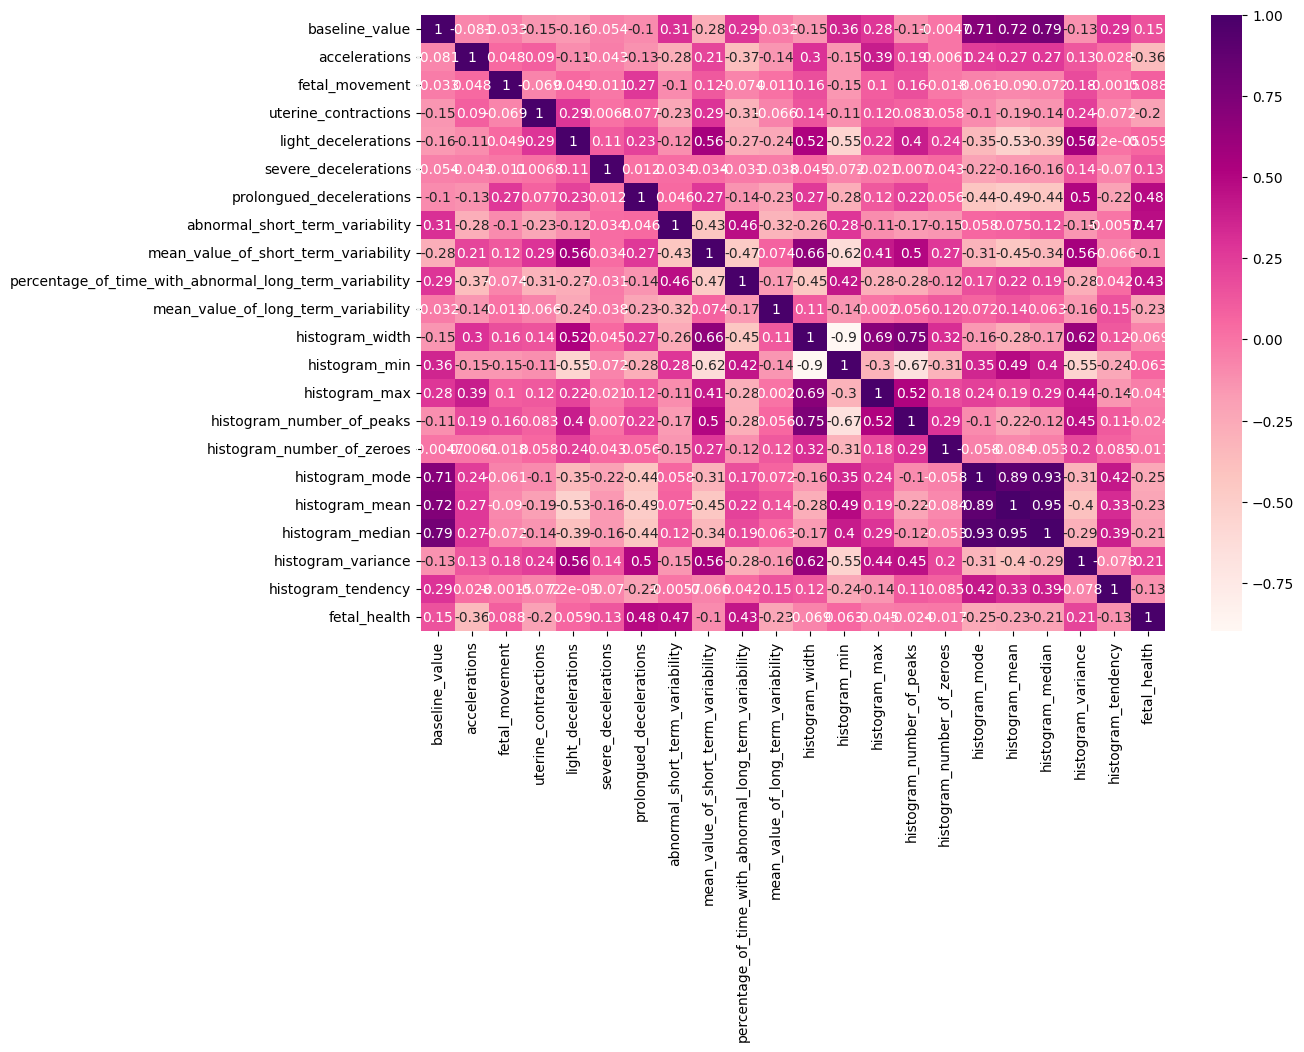

In [9]:
# generate heatmap to display correlations in data
corr = df.corr()
fig, ax = plt.subplots(figsize=(12, 8))
sns.heatmap(corr, annot=True, cmap="RdPu");

The feature showing the strongest correlation with fetal health is prolonged decelerations, with a correlation of 0.485. There are moderate correlations also observed between fetal health and abnormal short term variability, as well as fetal health and percentage of time with abnormal long term variability.

# Data Preparation

In [10]:
# checking for null values
df.isnull().sum()

,0
baseline_value,0
accelerations,0
fetal_movement,0
uterine_contractions,0
light_decelerations,0
severe_decelerations,0
prolongued_decelerations,0
abnormal_short_term_variability,0
mean_value_of_short_term_variability,0
percentage_of_time_with_abnormal_long_term_variability,0


This dataset had no null values to be dealt with.

In [11]:
# checking value counts for target variable
df.fetal_health.value_counts()

,count
fetal_health,
1.0,1655
2.0,295
3.0,176


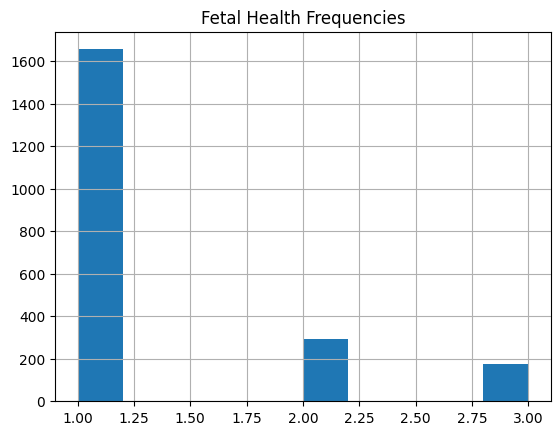

In [12]:
# plotting target variable frequencies
df.fetal_health.hist()
plt.title('Fetal Health Frequencies');

# Feature Engineering

The target class, fetal health, is very unbalanced. The majority of the fetal health outcomes observed in this dataset are 1.00, which is the designation for Normal fetal health. The class with the second-highest frequency is the 2.00 or Suspect fetal health class. The class with the lowest frequency in this dataset is 3.00 or Pathological fetal health.
To make the data slightly easier to work with and understand, and turn this into a binary classification problem, I combined the 2.00 and 3.00 classes of Suspect and Pathological fetal health into a category called At Risk. I designated all the values of 1.00 as Normal.

In [13]:
# engineering new categorical target column for Normal and At Risk fetal health
df.loc[df['fetal_health']==1.000, 'fh_outcome'] = 'Normal'
df.loc[df['fetal_health']==2.000, 'fh_outcome'] = 'At Risk'
df.loc[df['fetal_health']==3.000, 'fh_outcome'] = 'At Risk'

In [14]:
df = df.drop(columns='fetal_health', axis=1)

In [15]:
df.head()

,baseline_value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fh_outcome
0,120.0,0.000,0.0,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,At Risk
1,132.0,0.006,0.0,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,Normal
2,133.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,Normal
3,134.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,Normal
4,132.0,0.007,0.0,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,Normal


In [16]:
df.fh_outcome.value_counts()

,count
fh_outcome,
Normal,1655
At Risk,471


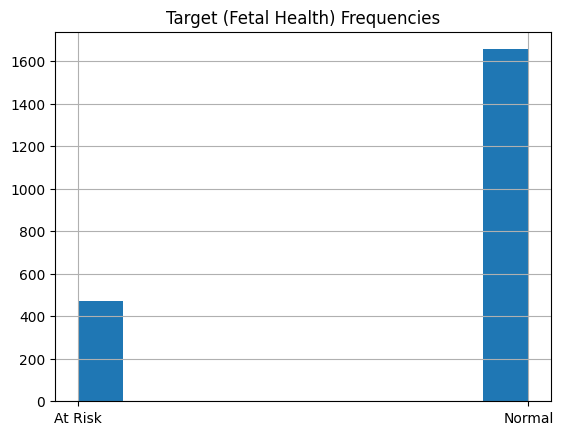

In [17]:
# plotting target frequencies
df.fh_outcome.hist()
plt.title('Target (Fetal Health) Frequencies');

The dataset remains notably imbalanced; however, approaching it as a binary classification task introduces a degree of analytical clarity. Given the objective of optimizing fetal health outcomes, it is imperative that all instances classified as at-risk be addressed with appropriate seriousness and urgency.

Encoding

In [18]:
df.dtypes

,0
baseline_value,float64
accelerations,float64
fetal_movement,float64
uterine_contractions,float64
light_decelerations,float64
severe_decelerations,float64
prolongued_decelerations,float64
abnormal_short_term_variability,float64
mean_value_of_short_term_variability,float64
percentage_of_time_with_abnormal_long_term_variability,float64


In [19]:
df = pd.get_dummies(df, columns=['fh_outcome'])
df.head()

,baseline_value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fh_outcome_At Risk,fh_outcome_Normal
0,120.0,0.000,0.0,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,True,False
1,132.0,0.006,0.0,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,False,True
2,133.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,False,True
3,134.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,False,True
4,132.0,0.007,0.0,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,False,True


In [20]:
df.columns

Index(['baseline_value', 'accelerations', 'fetal_movement',
       'uterine_contractions', 'light_decelerations', 'severe_decelerations',
       'prolongued_decelerations', 'abnormal_short_term_variability',
       'mean_value_of_short_term_variability',
       'percentage_of_time_with_abnormal_long_term_variability',
       'mean_value_of_long_term_variability', 'histogram_width',
       'histogram_min', 'histogram_max', 'histogram_number_of_peaks',
       'histogram_number_of_zeroes', 'histogram_mode', 'histogram_mean',
       'histogram_median', 'histogram_variance', 'histogram_tendency',
       'fh_outcome_At Risk', 'fh_outcome_Normal'],
      dtype='object')

In [21]:
df = df.drop(columns=['fh_outcome_Normal'], axis=1)
df.head()

,baseline_value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fh_outcome_At Risk
0,120.0,0.000,0.0,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,True
1,132.0,0.006,0.0,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,False
2,133.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,False
3,134.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,False
4,132.0,0.007,0.0,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,False


In [22]:
df['fh_outcome_At Risk'].value_counts()

,count
fh_outcome_At Risk,
False,1655
True,471


In [23]:
df = df.rename(columns={'fh_outcome_At Risk':'target'})
df.target.value_counts()

,count
target,
False,1655
True,471


In [24]:
df['target'] = df['target'].astype(int)
df.target.value_counts()

,count
target,
0,1655
1,471


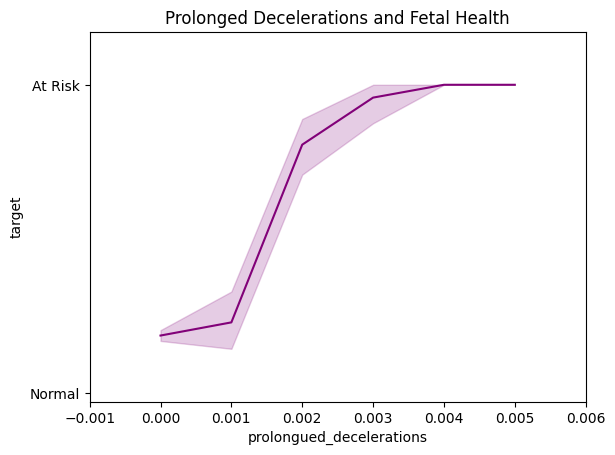

In [25]:
sns.set_palette(palette='RdPu_r')
sns.lineplot(x='prolongued_decelerations', y='target', data=df, alpha=1.0)
y = [0,1]
labels = ['Normal', 'At Risk']
plt.yticks(y, labels)
plt.margins(0.2)
plt.title('Prolonged Decelerations and Fetal Health')
plt.show()

# Modelling

In [26]:
y = df['target']
X = df.drop('target', axis=1)

# splitting the data into train and test sets
# using stratify parameter to make sure class ratios
# are distributed evenly across train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

Model #1 - Baseline Model

I started with a baseline model using a standard Decision Tree, as these models are known to perform reasonably well on imbalanced datasets.

In [36]:
# instantiating and fitting decision tree model
tree_clf = DecisionTreeClassifier(criterion='gini', max_depth=5, random_state=42)
tree_clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, random_state=42)

In [37]:
y_pred = tree_clf.predict(X_test)

# confusion matrix and classification report
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print('Recall score: ',recall_score(y_test, y_pred))

[[326   6]
 [ 23  71]]
              precision    recall  f1-score   support

           0       0.93      0.98      0.96       332
           1       0.92      0.76      0.83        94

    accuracy                           0.93       426
   macro avg       0.93      0.87      0.89       426
weighted avg       0.93      0.93      0.93       426

Recall score:  0.7553191489361702


[Text(0.46875, 0.9166666666666666, 'x[8] <= 0.55\ngini = 0.345\nsamples = 1700\nvalue = [1323, 377]'),
 Text(0.21875, 0.75, 'x[7] <= 59.5\ngini = 0.385\nsamples = 300\nvalue = [78, 222]'),
 Text(0.34375, 0.8333333333333333, 'True  '),
 Text(0.10416666666666667, 0.5833333333333334, 'x[9] <= 61.0\ngini = 0.388\nsamples = 57\nvalue = [42, 15]'),
 Text(0.08333333333333333, 0.4166666666666667, 'x[19] <= 4.5\ngini = 0.329\nsamples = 53\nvalue = [42, 11]'),
 Text(0.041666666666666664, 0.25, 'x[12] <= 101.5\ngini = 0.231\nsamples = 45\nvalue = [39, 6]'),
 Text(0.020833333333333332, 0.08333333333333333, 'gini = 0.444\nsamples = 3\nvalue = [1, 2]'),
 Text(0.0625, 0.08333333333333333, 'gini = 0.172\nsamples = 42\nvalue = [38, 4]'),
 Text(0.125, 0.25, 'x[12] <= 119.5\ngini = 0.469\nsamples = 8\nvalue = [3, 5]'),
 Text(0.10416666666666667, 0.08333333333333333, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]'),
 Text(0.14583333333333334, 0.08333333333333333, 'gini = 0.0\nsamples = 5\nvalue = [0, 5]'),
 Tex

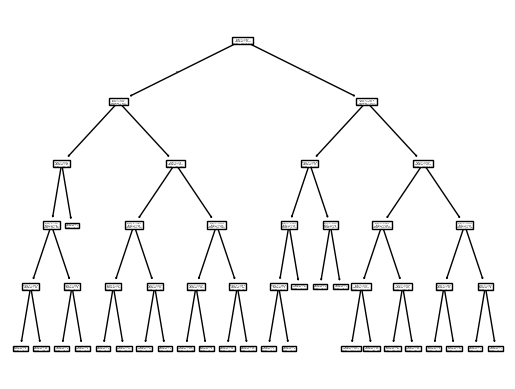

In [38]:
from sklearn import tree
tree.plot_tree(tree_clf)

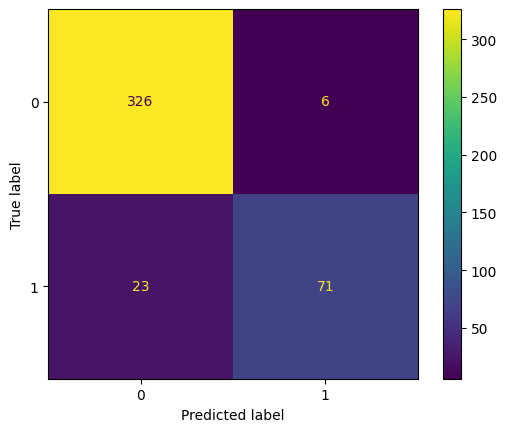

In [40]:
from sklearn.metrics import ConfusionMatrixDisplay
# plotting confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=tree_clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=tree_clf.classes_)
disp.plot()
plt.show()

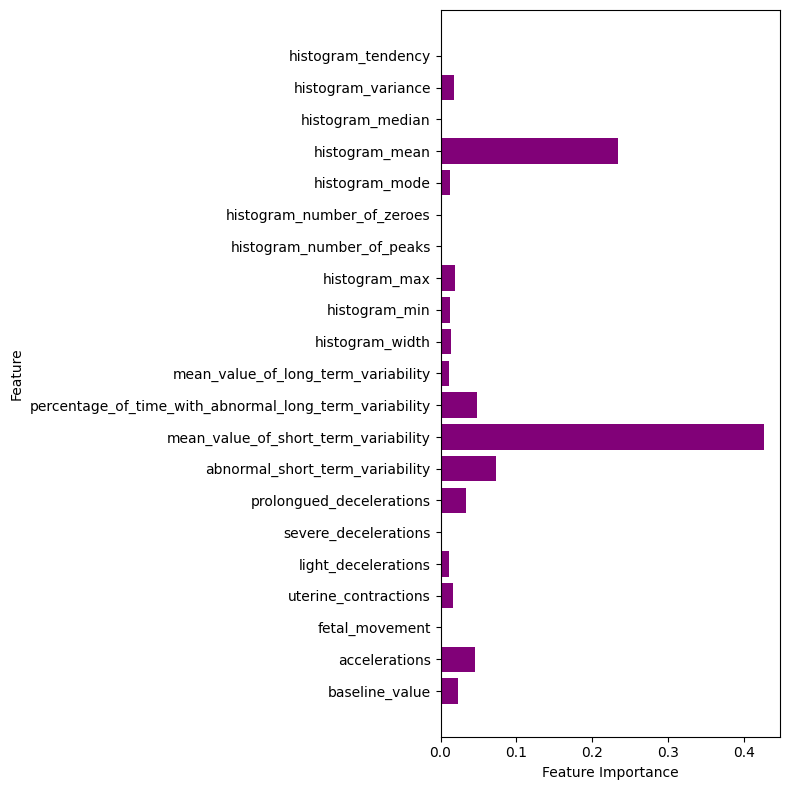

In [41]:
# plotting feature importances
def plot_feature_importances(model):
    n_features = X_train.shape[1]
    plt.figure(figsize=(8,8))
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), X_train.columns.values)
    plt.xlabel('Feature Importance')
    plt.ylabel('Feature')

plot_feature_importances(tree_clf)
plt.tight_layout()
#plt.savefig('./images/fig2.png')

The baseline decision tree model has allotted the most importance to abnormal short-term and long-term variability of fetal heart rate, as well as CTG histogram mean. Given the strong correlations noted earlier, it is not surprising that the classifier prioritized these particular features.

### Handling Class Imbalance  
As previously discussed, the fetal health outcome classes are significantly imbalanced, with the majority of instances belonging to the negative (normal health) class. To mitigate this, I re-ran the baseline Decision Tree model with the `class_weight` parameter set to `"balanced"`. This setting automatically adjusts the weights inversely proportional to class frequencies, ensuring that the total weight is equal across classes. In effect, it assigns less weight to the majority (normal health) class and more to the minority (at-risk) class. I chose this approach to address the imbalance without reducing the dataset size, as would occur with undersampling, or risking overfitting through oversampling.

Model #2 - Decision Tree w/ Balanced Class Weight

In [42]:
tree_clf = DecisionTreeClassifier(criterion='gini', max_depth=5, class_weight='balanced', random_state=42)
tree_clf.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=5, random_state=42)

In [43]:
y_pred = tree_clf.predict(X_test)

# confusion matrix and classification report
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print('Recall score: ',recall_score(y_test, y_pred))

[[303  29]
 [  9  85]]
              precision    recall  f1-score   support

           0       0.97      0.91      0.94       332
           1       0.75      0.90      0.82        94

    accuracy                           0.91       426
   macro avg       0.86      0.91      0.88       426
weighted avg       0.92      0.91      0.91       426

Recall score:  0.9042553191489362


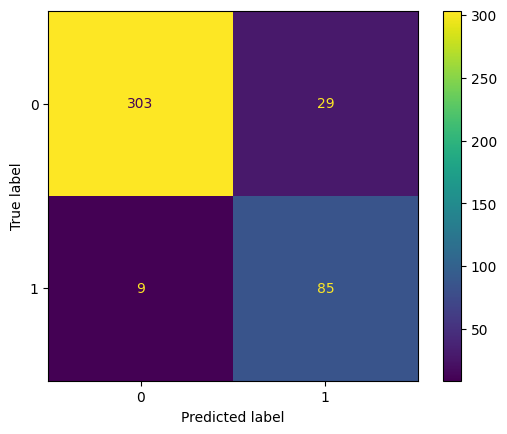

In [44]:
cm = confusion_matrix(y_test, y_pred, labels=tree_clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=tree_clf.classes_)
disp.plot()
plt.show()

After balancing the class weights, the model has been improved to a recall value of 9ß%. But it still missed 9 of the at-risk class, so it requires further improvement.

With a baseline model established for comparison, I chose to streamline the modeling workflow using `sklearn` Pipelines and `GridSearchCV`. This setup allowed for efficient hyperparameter tuning with a focus on optimizing recall. To begin, I implemented a function that constructs a pipeline for any given classifier.

In [27]:
# function to make a pipeline with classifier input
def pipe_maker(classifier):
    '''Takes in a classifier, returns a pipeline'''
    pipe = Pipeline([('scl', StandardScaler()),
                    ('clf', classifier(class_weight= 'balanced', random_state=42))])
    return pipe


In [28]:
# function to create a grid search containing pipeline
def gridsearch_maker(pipeline, params):
    '''Takes in a pipeline and param grid, returns GridSearchCV object'''
    return GridSearchCV(estimator=pipeline,
                        param_grid=params,
                        scoring='recall',
                        cv=10,
                        n_jobs=-1)

In [29]:
# setting generic grid search parameters
param_range = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
param_range_small = [1.0, 0.5, 0.1]

a function to find the best hyperparameters to optimize recall for a given model, print the classification report for the model with the best parameters, and print the confusion matrix for this model as well.

In [30]:
def find_best_recall(gridsearch):
    """
    Runs a grid search iterating through predefined grid params and returns best params to optimize recall score.

    Fits classifier to X_train and y_train.
    Determines and prints best params for recall.
    Determines and prints best training set recall.
    Predicts on test data using best params.
    Prints best test set recall.
    Prints classification report for best model.
    Plots confusion matrix for best model.

    Parameters:
    gridsearch: Predefined instance of GridsearchCV with parameters and estimator/pipeline already set.

    Returns:
    Best parameters for particular grid search, based on recall score.
    Best training set recall.
    Best test set recall.
    Classification report for best model.
    Confusion matrix for best model.

    """
    # fitting the grid search objects
    best_recall = 0.0
    # fitting grid search
    gridsearch.fit(X_train, y_train)
    # best params
    print('Best params: %s' % gridsearch.best_params_)
    # best training data recall
    print('Best training recall: %.3f' % gridsearch.best_score_)
    # predict on test data with best params
    y_pred = gridsearch.predict(X_test)
    # test data recall with best params
    print('Test set recall score for best params: %.3f ' % recall_score(y_test, y_pred))
    # confusion matrix and classification report
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print('Recall score: ',recall_score(y_test, y_pred))
    # plotting confusion matrix
    cm = confusion_matrix(y_test, y_pred, labels=gridsearch.classes_)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=gridsearch.classes_)
    disp.plot()
    plt.show()

Model #3 - Logistic Regression w/ Pipeline and Grid Search

Best params: {'clf__C': 0.1, 'clf__penalty': 'l1', 'clf__solver': 'liblinear'}
Best training recall: 0.931
Test set recall score for best params: 0.915 
[[283  49]
 [  8  86]]
              precision    recall  f1-score   support

           0       0.97      0.85      0.91       332
           1       0.64      0.91      0.75        94

    accuracy                           0.87       426
   macro avg       0.80      0.88      0.83       426
weighted avg       0.90      0.87      0.87       426

Recall score:  0.9148936170212766


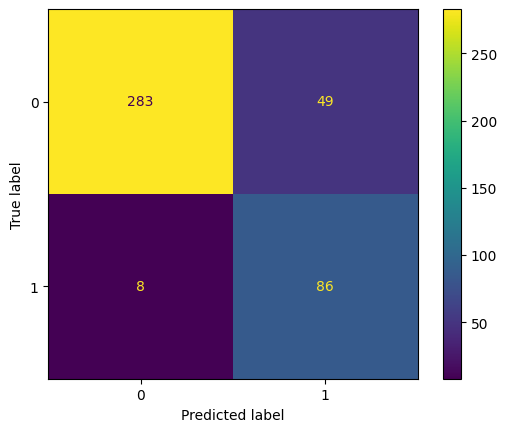

In [51]:
# fitting Logistic Regression pipeline
pipe_lr = pipe_maker(LogisticRegression)

# setting grid search parameters
grid_params_lr = [{'clf__penalty': ['l1', 'l2'],
                   'clf__C': param_range_small,
                   'clf__solver': ['liblinear']}]

# creating grid search object
gs_lr = gridsearch_maker(pipe_lr, grid_params_lr)

# finding best parameters for recall
find_best_recall(gs_lr)

Model #4 - Random Forest w/ Pipeline and Grid Search

In [31]:
# fitting Random Forest pipeline
pipe_rf = pipe_maker(RandomForestClassifier)

# setting grid search parameters
grid_params_rf = [{'clf__criterion': ['gini', 'entropy'],
                   'clf__min_samples_leaf': param_range,
                   'clf__max_depth': param_range,
                   'clf__min_samples_split': param_range[1:]}]

# creating grid search object
gs_rf = gridsearch_maker(pipe_rf, grid_params_rf)

# finding best parameters for recall
find_best_recall(gs_rf)


Best params: {'clf__criterion': 'entropy', 'clf__max_depth': 8, 'clf__min_samples_leaf': 8, 'clf__min_samples_split': 2}
Best training recall: 0.923
Test set recall score for best params: 0.936 
[[307  25]
 [  6  88]]
              precision    recall  f1-score   support

           0       0.98      0.92      0.95       332
           1       0.78      0.94      0.85        94

    accuracy                           0.93       426
   macro avg       0.88      0.93      0.90       426
weighted avg       0.94      0.93      0.93       426

Recall score:  0.9361702127659575


NameError: name 'ConfusionMatrixDisplay' is not defined

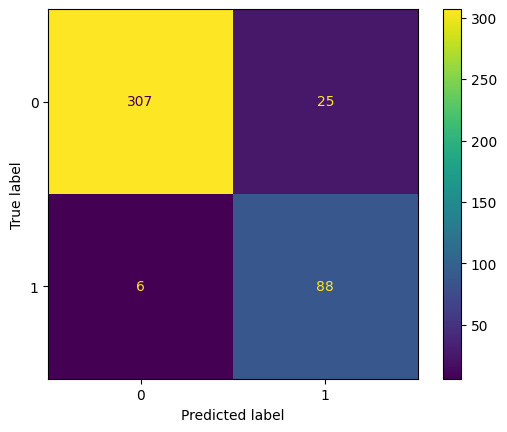

In [34]:
y_pred = gs_rf.predict(X_test)
cm = confusion_matrix(y_test, y_pred, labels=gs_rf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=gs_rf.classes_)
disp.plot()
plt.show()

Model #5 - Support Vector Machine w/ Pipeline and Grid Search

Best params: {'clf__C': 1, 'clf__kernel': 'rbf'}
Best training recall: 0.966
Test set recall score for best params: 0.936 
[[299  33]
 [  6  88]]
              precision    recall  f1-score   support

           0       0.98      0.90      0.94       332
           1       0.73      0.94      0.82        94

    accuracy                           0.91       426
   macro avg       0.85      0.92      0.88       426
weighted avg       0.92      0.91      0.91       426

Recall score:  0.9361702127659575


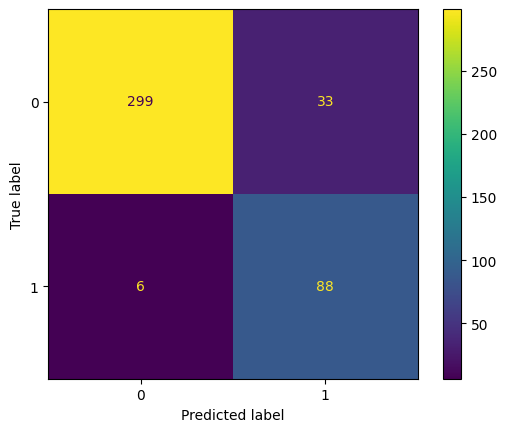

In [35]:
# fitting Support Vector Machine pipeline
pipe_svm = pipe_maker(svm.SVC)

# setting grid search parameters
grid_params_svm = [{'clf__kernel': ['linear', 'rbf'],
                    'clf__C': param_range}]

# creating grid search object
gs_svm = gridsearch_maker(pipe_svm, grid_params_svm)

# finding best parameters for recall
find_best_recall(gs_svm)


Extra Trees w/ Pipeline and Grid Search

Best params: {'clf__criterion': 'entropy', 'clf__max_depth': 10, 'clf__min_samples_leaf': 2, 'clf__min_samples_split': 8}
Best training recall: 0.926
Test set recall score for best params: 0.915 
[[301  31]
 [  8  86]]
              precision    recall  f1-score   support

           0       0.97      0.91      0.94       332
           1       0.74      0.91      0.82        94

    accuracy                           0.91       426
   macro avg       0.85      0.91      0.88       426
weighted avg       0.92      0.91      0.91       426

Recall score:  0.9148936170212766


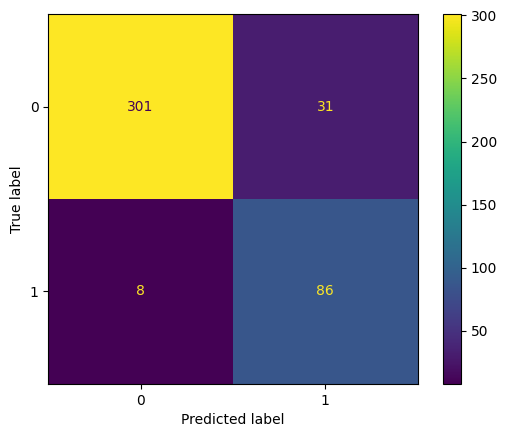

In [36]:
# fitting Extra Trees pipeline
pipe_et = pipe_maker(ExtraTreesClassifier)

# setting grid search parameters
grid_params_et = [{'clf__criterion': ['gini', 'entropy'],
                   'clf__min_samples_leaf': param_range,
                   'clf__max_depth': param_range,
                   'clf__min_samples_split': param_range[1:]}]

# creating grid search object
gs_et = gridsearch_maker(pipe_et, grid_params_et)

# finding best parameters for recall
find_best_recall(gs_et)